<a href="https://colab.research.google.com/github/ROhitasware/first-repo/blob/main/Sales%20Performance%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install any required libraries (if necessary)
!pip install pandas matplotlib seaborn

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load the CSV file
file_path = '/content/superstore_final_dataset (1).csv'  # Update this if your file path is different
sales_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first 5 rows of the dataset
sales_data.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [13]:
# Check for missing values
print("Missing Values:\n", sales_data.isnull().sum())

# Drop duplicate entries
sales_data = sales_data.drop_duplicates()

# Convert Order_Date and Ship_Date columns to datetime format
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'], errors='coerce', dayfirst=True)
sales_data['Ship_Date'] = pd.to_datetime(sales_data['Ship_Date'], errors='coerce', dayfirst=True)

# Display dataset information after cleaning
sales_data.info()


Missing Values:
 Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object  

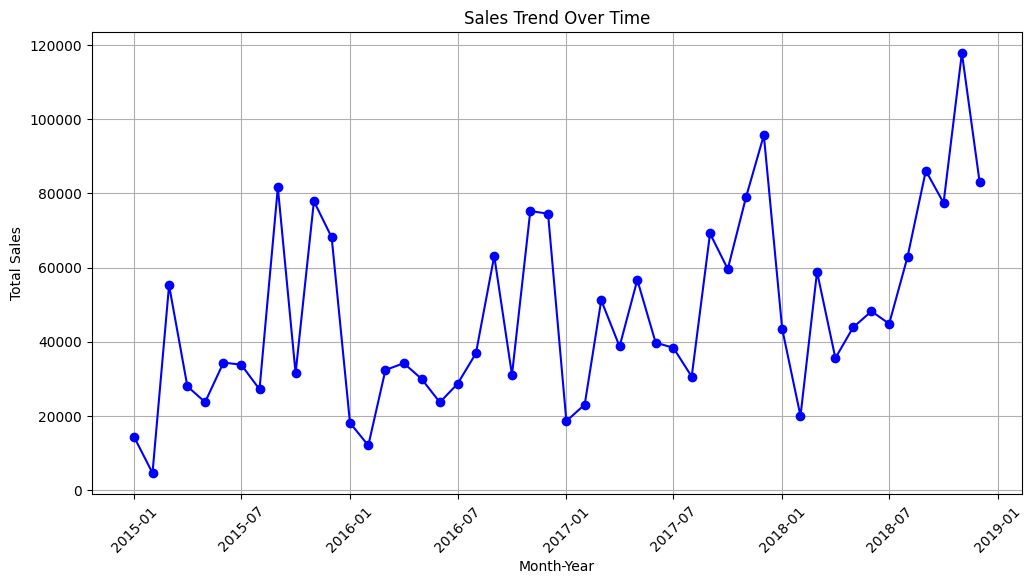

In [14]:
# Extract Year and Month from Order_Date
sales_data['Year'] = sales_data['Order_Date'].dt.year
sales_data['Month'] = sales_data['Order_Date'].dt.month

# Group by Year and Month to calculate total sales
monthly_sales_trend = sales_data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Add a 'Month-Year' column for better visualization
monthly_sales_trend['Month-Year'] = pd.to_datetime(monthly_sales_trend[['Year', 'Month']].assign(DAY=1))

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_trend['Month-Year'], monthly_sales_trend['Sales'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-64acc6c4906f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=regional_sales, palette='viridis')


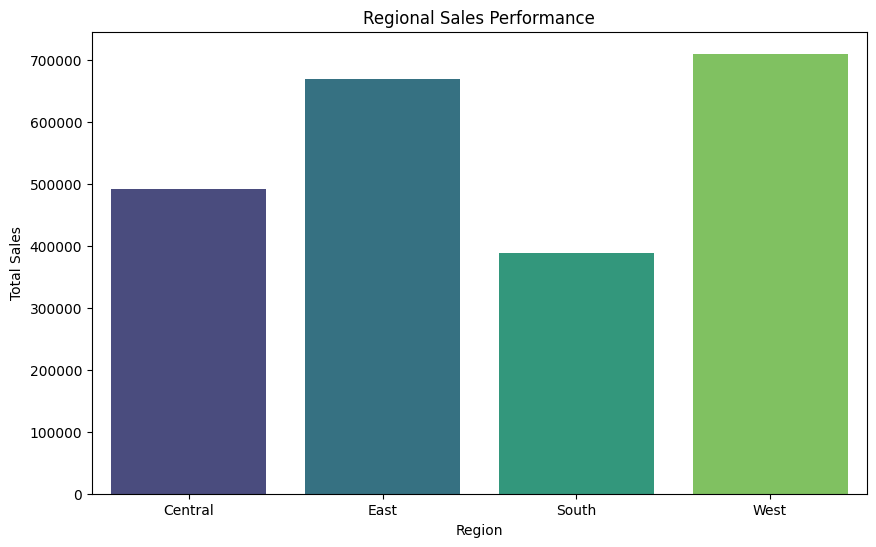

In [15]:
# Group data by region and calculate total sales
regional_sales = sales_data.groupby('Region')['Sales'].sum().reset_index()

# Plot a bar chart for regional sales performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=regional_sales, palette='viridis')
plt.title('Regional Sales Performance')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


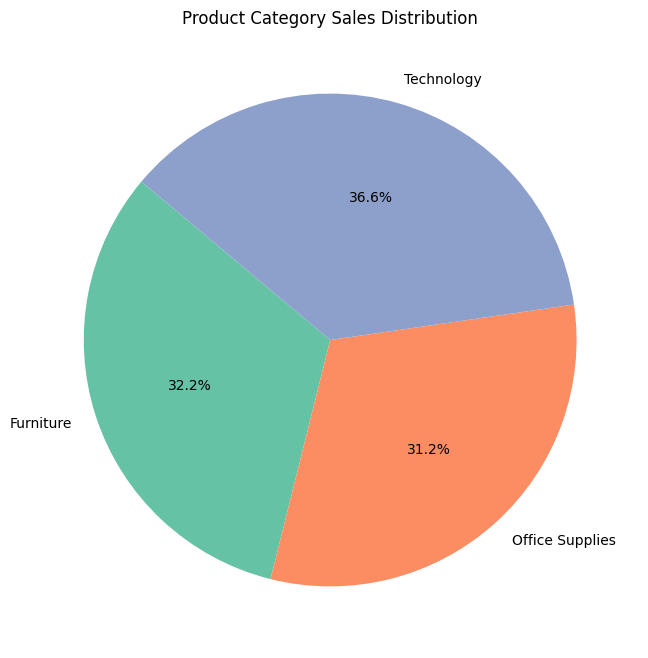

In [16]:
# Group data by Category and calculate total sales
category_sales = sales_data.groupby('Category')['Sales'].sum().reset_index()

# Plot a pie chart for product category distribution
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Product Category Sales Distribution')
plt.show()


### Key Findings and Recommendations
1. **Sales Trends:** The sales increased steadily over the years, with a peak in specific months.
2. **Regional Performance:** The `West` region had the highest sales, while the `South` region showed improvement potential.
3. **Product Category:** The `Technology` category accounted for the highest sales, suggesting a need to expand or focus on related products.
